### Processing Data

# X-y split 

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df1 = pd.read_csv("./marketing_customer_analysis4.csv")
display(df1.head())

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A,January


In [58]:
numerical = df1.select_dtypes('number')
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly premium auto           9134 non-null   int64  
 3   months since last claim        9134 non-null   float64
 4   months since policy inception  9134 non-null   int64  
 5   number of open complaints      9134 non-null   float64
 6   number of policies             9134 non-null   int64  
 7   total claim amount             9134 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 571.0 KB


In [64]:
y = numerical["total claim amount"]
x_num = numerical.drop(['total claim amount'], axis=1)
x_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,5035.035257,37405,63,8.0,99,3.0,4
...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1
9130,19228.463620,0,187,14.0,32,0.0,2
9131,5259.444853,61146,65,7.0,68,0.0,6
9132,23893.304100,39837,201,11.0,63,0.0,2


### Normalize (numerical)

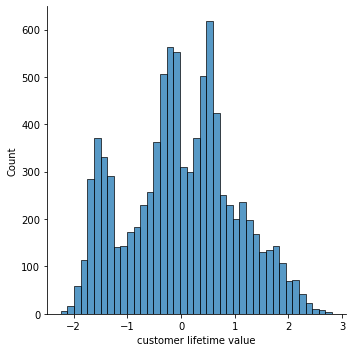

In [65]:
def replace_0(x):
    if x <= 0:
        return 0
    else:
        return x
    
x_num['customer lifetime value'] = list(map(replace_0, x_num['customer lifetime value']))
mean = x_num['customer lifetime value'].mean()
x_num['customer lifetime value'] = x_num['customer lifetime value'].replace(0,mean)

pt = PowerTransformer()
pt.fit(x_num[['customer lifetime value']])
x_num['customer lifetime value'] = pt.transform(x_num[['customer lifetime value']])


sns.displot(x_num['customer lifetime value'])

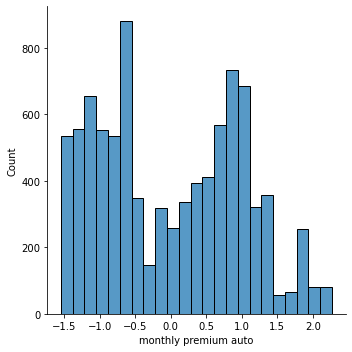

In [66]:
def replace_0(x):
    if x <= 0:
        return 0
    else:
        return x
    
x_num['monthly premium auto'] = list(map(replace_0, x_num['monthly premium auto']))
mean = x_num['monthly premium auto'].mean()
x_num['monthly premium auto'] = x_num['monthly premium auto'].replace(0,mean)

pt = PowerTransformer()
pt.fit(x_num[['monthly premium auto']])
x_num['monthly premium auto'] = pt.transform(x_num[['monthly premium auto']])


sns.displot(x_num['monthly premium auto'])

In [80]:
transformer = MinMaxScaler().fit(x_num)
x_normalized = transformer.transform(x_num)
x_normalized = pd.DataFrame(x_normalized, columns=x_num.columns)
x_normalized

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.376918,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.074027,0.000000,0.074787,0.085714,0.262626,0.0,0.000
2,0.699331,0.221432,0.569624,0.971429,0.313131,0.0,0.125
3,0.786349,0.490873,0.545067,0.285714,0.030303,0.0,0.125
4,0.392565,0.374121,0.050822,0.228571,1.000000,0.6,0.375
...,...,...,...,...,...,...,...
9129,0.168242,0.598664,0.271867,0.857143,0.828283,0.8,0.000
9130,0.755318,0.000000,0.893301,0.400000,0.323232,0.0,0.125
9131,0.407206,0.611576,0.097855,0.200000,0.686869,0.0,0.625
9132,0.799840,0.398446,0.914956,0.314286,0.636364,0.0,0.125


Text(0.5, 1.0, 'Number of policies')

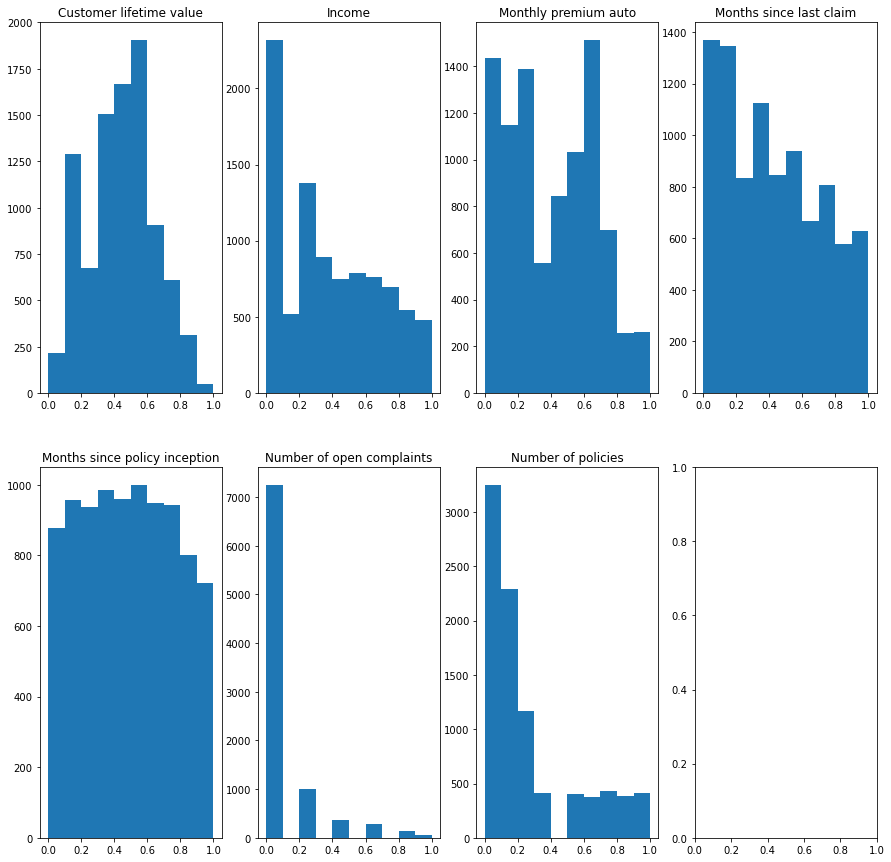

In [85]:
fig, ax = plt.subplots(2,4, figsize=(15,15))
ax[0,0].hist(x_normalized["customer lifetime value"])
ax[0,0].set_title("Customer lifetime value")
ax[0,1].hist(x_normalized["income"])
ax[0,1].set_title("Income")
ax[0,2].hist(x_normalized["monthly premium auto"])
ax[0,2].set_title("Monthly premium auto")
ax[0,3].hist(x_normalized["months since last claim"])
ax[0,3].set_title("Months since last claim")
ax[1,0].hist(x_normalized["months since policy inception"])
ax[1,0].set_title("Months since policy inception")
ax[1,1].hist(x_normalized["number of open complaints"])
ax[1,1].set_title("Number of open complaints")
ax[1,2].hist(x_normalized["number of policies"])
ax[1,2].set_title("Number of policies")

In [82]:
transformer = StandardScaler().fit(x_num)
x_standardized = transformer.transform(x_num)
x_standardized = pd.DataFrame(x_standardized, columns=x_num.columns)

Text(0.5, 1.0, 'Number of policies')

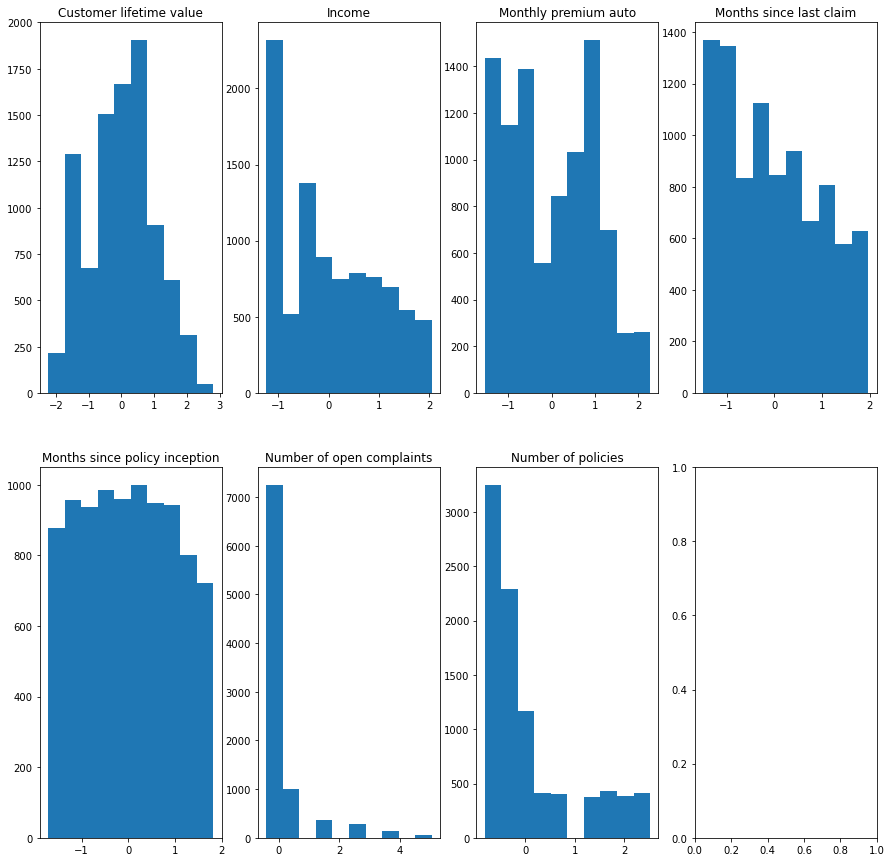

In [84]:
fig, ax = plt.subplots(2,4, figsize=(15,15))
ax[0,0].hist(x_standardized["customer lifetime value"])
ax[0,0].set_title("Customer lifetime value")
ax[0,1].hist(x_standardized["income"])
ax[0,1].set_title("Income")
ax[0,2].hist(x_standardized["monthly premium auto"])
ax[0,2].set_title("Monthly premium auto")
ax[0,3].hist(x_standardized["months since last claim"])
ax[0,3].set_title("Months since last claim")
ax[1,0].hist(x_standardized["months since policy inception"])
ax[1,0].set_title("Months since policy inception")
ax[1,1].hist(x_standardized["number of open complaints"])
ax[1,1].set_title("Number of open complaints")
ax[1,2].hist(x_standardized["number of policies"])
ax[1,2].set_title("Number of policies")